In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

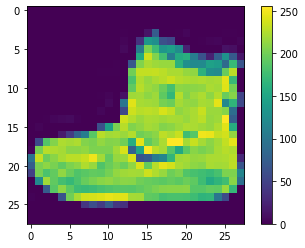

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

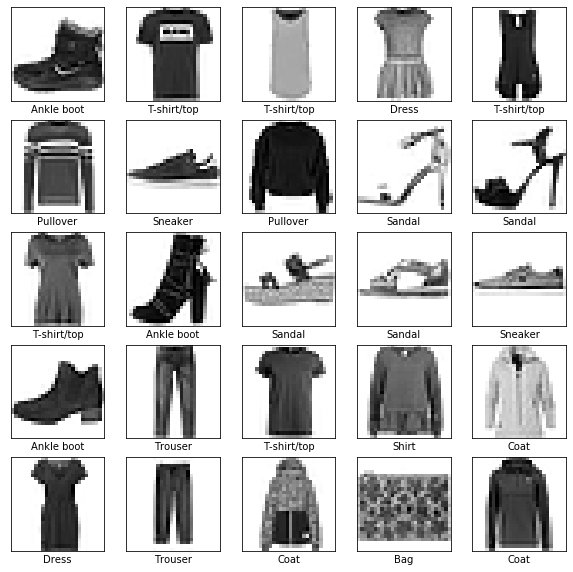

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4986 - accuracy: 0.8245
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3780 - accuracy: 0.8633
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3370 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3166 - accuracy: 0.8841
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2958 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2804 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2693 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2590 - accuracy: 0.9033
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2496 - accuracy: 0.9069
Epoch 10/10
60

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/1 - 0s - loss: 0.2121 - accuracy: 0.8854

Test accuracy: 0.8854


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]


array([ -9.283883  , -15.373791  , -14.025495  , -18.825039  ,
       -10.075164  ,  -1.8839502 , -10.37677   ,   0.77483356,
       -14.064398  ,   4.4962587 ], dtype=float32)

In [18]:
np.argmax(predictions[0])


9

In [19]:
test_labels[0]


9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

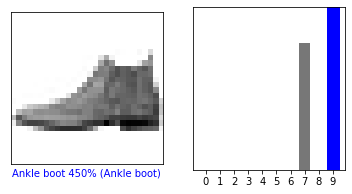

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

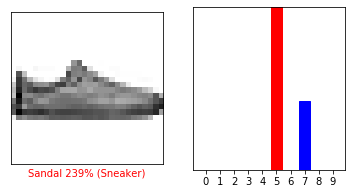

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



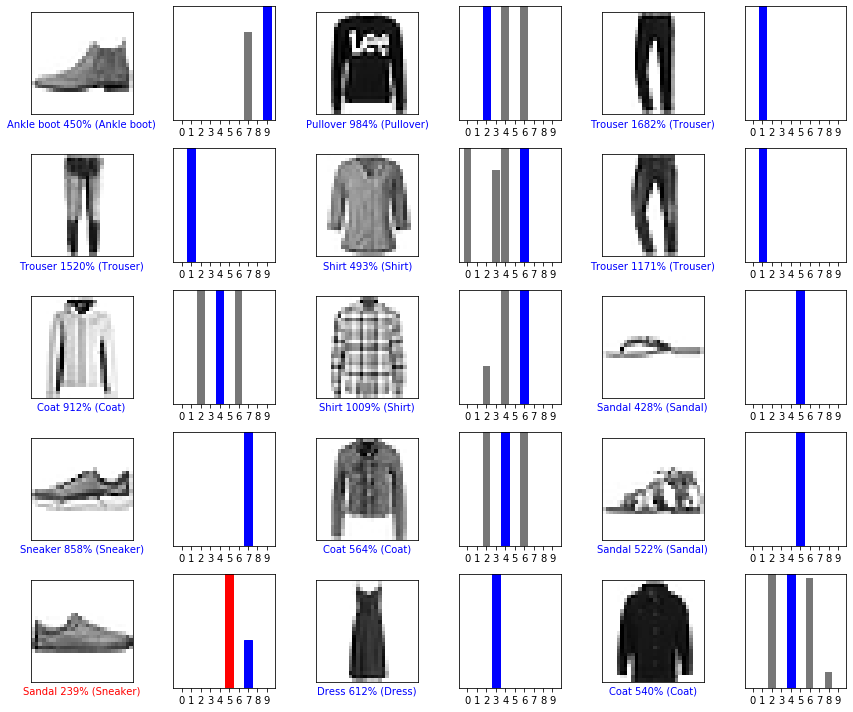

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [50]:
# Grab an image from the test dataset.
test_index=1
img = test_images[test_index]

print(img.shape)

(28, 28)

(28, 28)


(28, 28)

In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[ -0.572256  -24.655704    9.841674   -9.454971    3.4199362 -17.617676
    2.696663  -33.486214  -11.959242  -27.308058 ]]


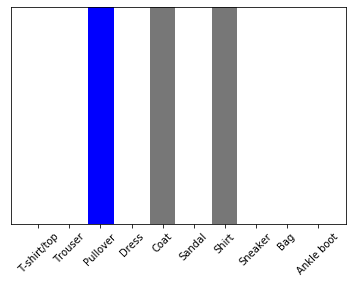

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
single_prediction = np.argmax(predictions_single[0])
single_prediction

2

In [35]:
def find_similar(test_labels, predicted_label): # function to find idices of similar types of clothing
    g = (i for i, e in enumerate(test_labels) if e == predicted_label)
    array_of_indices = np.zeros(5)
    for i in range(5):
        array_of_indices[i] = next(g)
    return array_of_indices
        

        

In [41]:
similar_indices = find_similar(test_labels,single_prediction)
similar_indices

array([ 1., 16., 20., 46., 48.])

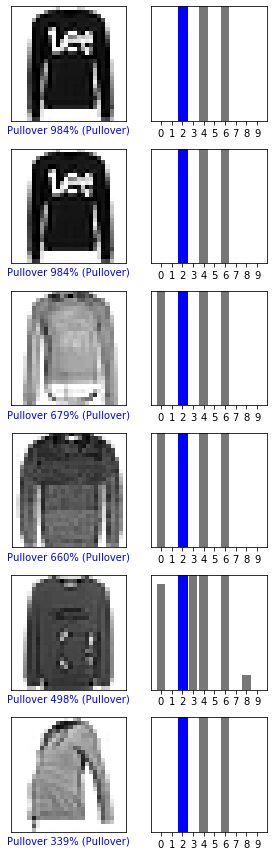

In [72]:
#shows first of all the image we have classified, and secondly similar images based on this classification

num_rows = 6
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) #sets up fig size
#next 4 lines plot the image we have predicted
plt.subplot(num_rows, 2*num_cols, 1)
plot_image(test_index, predictions[test_index], test_labels, test_images)
plt.subplot(num_rows, 2*num_cols, 2)
plot_value_array(test_index, predictions[test_index], test_labels)
#next few line splot similar images
for i in range((num_images)-1):
    j = int(similar_indices[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+3)
    plot_image(j, predictions[j], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+4)
    plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()

# need to demonstrate on a few other indices
# test_index is arbitrarily defined above. Need to make it variable (i.e you put in  a number and it shows you
# the prediction and the 'similars')
# change labels so it is clear what each one is
# pretty them up
# use seb_CNN ?? just to make it more my own. 



In [177]:
#Demonstrating with Image from the internet. A Ralph Lauren Shirt. (Ralph2)
import matplotlib.image as mpimg
from PIL import Image
shirt= Image.open('/Users/joshking/Documents/01AI/Ralph2.jpeg')
new_image = shirt.resize((28, 28))
greyscale_image = new_image.convert('L')
greyscale_image.save('/Users/joshking/Documents/01AI/greyscale_shirt_image.jpeg')
grey_im=(mpimg.imread('/Users/joshking/Documents/01AI/greyscale_shirt_image.jpeg')).copy()
grey_im.shape

(28, 28)

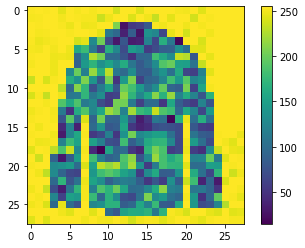

In [175]:
plt.figure()
plt.imshow(grey_im)
plt.colorbar()
plt.grid(False)
plt.show()

(1, 28, 28)
[[  3.5956547 -12.284247  -10.000077  -23.341064  -25.644373  -35.946472
    7.307222  -48.238544    1.6486461 -15.752578 ]]


6

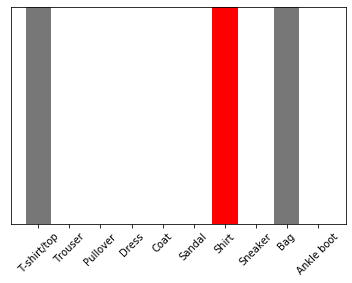

In [176]:
grey_im_norm = grey_im / 255.0

img_n = (np.expand_dims(grey_im_norm,0))

print(img_n.shape)

predictions_single = model.predict(img_n)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
single_prediction = np.argmax(predictions_single[0])
single_prediction